In [34]:
import numpy as np
import pandas as pd

In [39]:
#creating files for tests
GRID_file = "Grid1_out.bed"
chr_number = "chr1"

df_chr = pd.read_csv(GRID_file, sep="\t", header=None)
df_chr = df_chr[df_chr[4] == chr_number]

FileNotFoundError: File b'Grid3_out\\Grid3_out.bed' does not exist

In [32]:
#creating chr_dataframe and preparation for the analysis

def chr_extract(elem):
    chr_num = elem[3:]
    if chr_num == "X":
        elem = 23
    elif chr_num == "Y":
        elem = 24
    elif chr_num == "M":
        elem = 25
    else:
        elem = int(chr_num)
    return elem


chr_extract = np.vectorize(chr_extract)
df_chr[4] = df_chr[4].apply(chr_extract)

del df_chr[0]
del df_chr[1]
del df_chr[2]
del df_chr[3]
del df_chr[6]

#df_chr_analyse  = df_chr.values
df_chr_start = df_chr[5].values
df_chr_score = df_chr[7].values

In [14]:
#creating ench_dataframe and preparation for the analysis
ench_file = "ench"
df_ench = pd.read_csv(ench, sep="\t", header=None)
df_ench = df_ench[df_ench[1] == "chr1"]

window = 10000

df_ench = df_ench[df_ench[1] == ""]
df_ench[0] = df_ench[0].apply(chr_extract)
del df_ench[3]
del df_ench[4]

df_ench[3] = df_ench[2] - df_ench[1]
df_ench[4] = df_ench[1] - (window/2)
df_ench[5] = df_ench[1] + (window/2)

df_ench_analyse = df_ench.values
df_win_start = df_ench[4].values
df_win_stop = df_ench[5].values

In [15]:
import collections

def count_info(df_win_start, df_win_stop, df_chr_start, df_chr_score, bin_size):
    
    count_final = collections.Counter({0: 0})
    
    for line in range(len(df_win_start)):
        c = collections.Counter()
        win_start = df_win_start[line]
        win_end = df_win_stop[line]
        ind = np.logical_and((df_chr_start > win_start), (df_chr_start < win_end))
        
        read_db = df_chr_start[ind]
        score_db = df_chr_score[ind]
        read_db = read_db - win_start
        
        for i in range (len(read_db)):
            a = read_db[i] // bin_size
            c[a] += score_db[i]
            count_final += c
    return count_final

In [16]:
#building dataframe for experimental data
bin_size = 100
count_final_exp = count_info(df_win_start, df_win_stop, df_chr_start, df_chr_score, bin_size)

bins = list(count_final_exp.keys())
reads = list(count_final_exp.values())

df_exp = pd.DataFrame({'bin_number': bins, 'reads_number': reads}).sort_values('bin_number').reset_index(drop=True)
df_exp['reads_number'] = df_exp['reads_number'] / len(reads)

In [18]:
#building dataframe for randomization
chr_length = 78000000
ench_ran = np.linspace(0, chr_length, len(df_ench_analyse))

ench_ran_start =  ench_ran - (window/2)
ench_ran_stop =  ench_ran + (window/2)

df_ench_ran = pd.DataFrame({'start': (ench_ran_start), 'stop':(ench_ran_stop) })
df_win_start_ran = df_ench_ran['start'].values
df_win_stop_ran =  df_ench_ran['stop'].values

count_final_ran = count_info(df_win_start_ran, df_win_stop_ran, df_chr_start, df_chr_score, bin_size)

bins_ran = list(count_final_ran.keys())
reads_ran = list(count_final_ran.values())

df_ran = pd.DataFrame({'bin_number': bins_ran, 'ran_reads_number': reads_ran}).sort_values('bin_number').reset_index(drop=True)
df_ran['ran_reads_number'] = df_ran['ran_reads_number'] / len(reads)

In [20]:
#creating final df 
df_exp['ran_reads_number'] = df_ran['ran_reads_number']

<IPython.core.display.Javascript object>


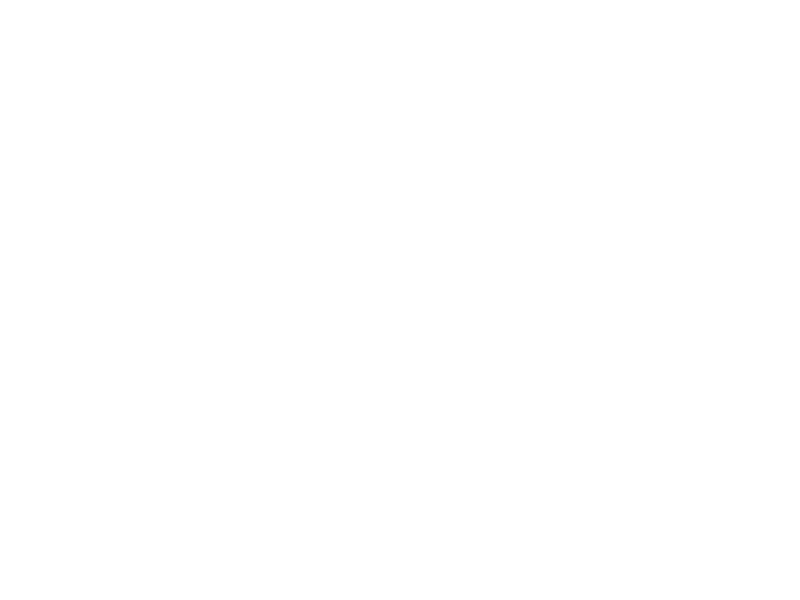

<IPython.core.display.Javascript object>


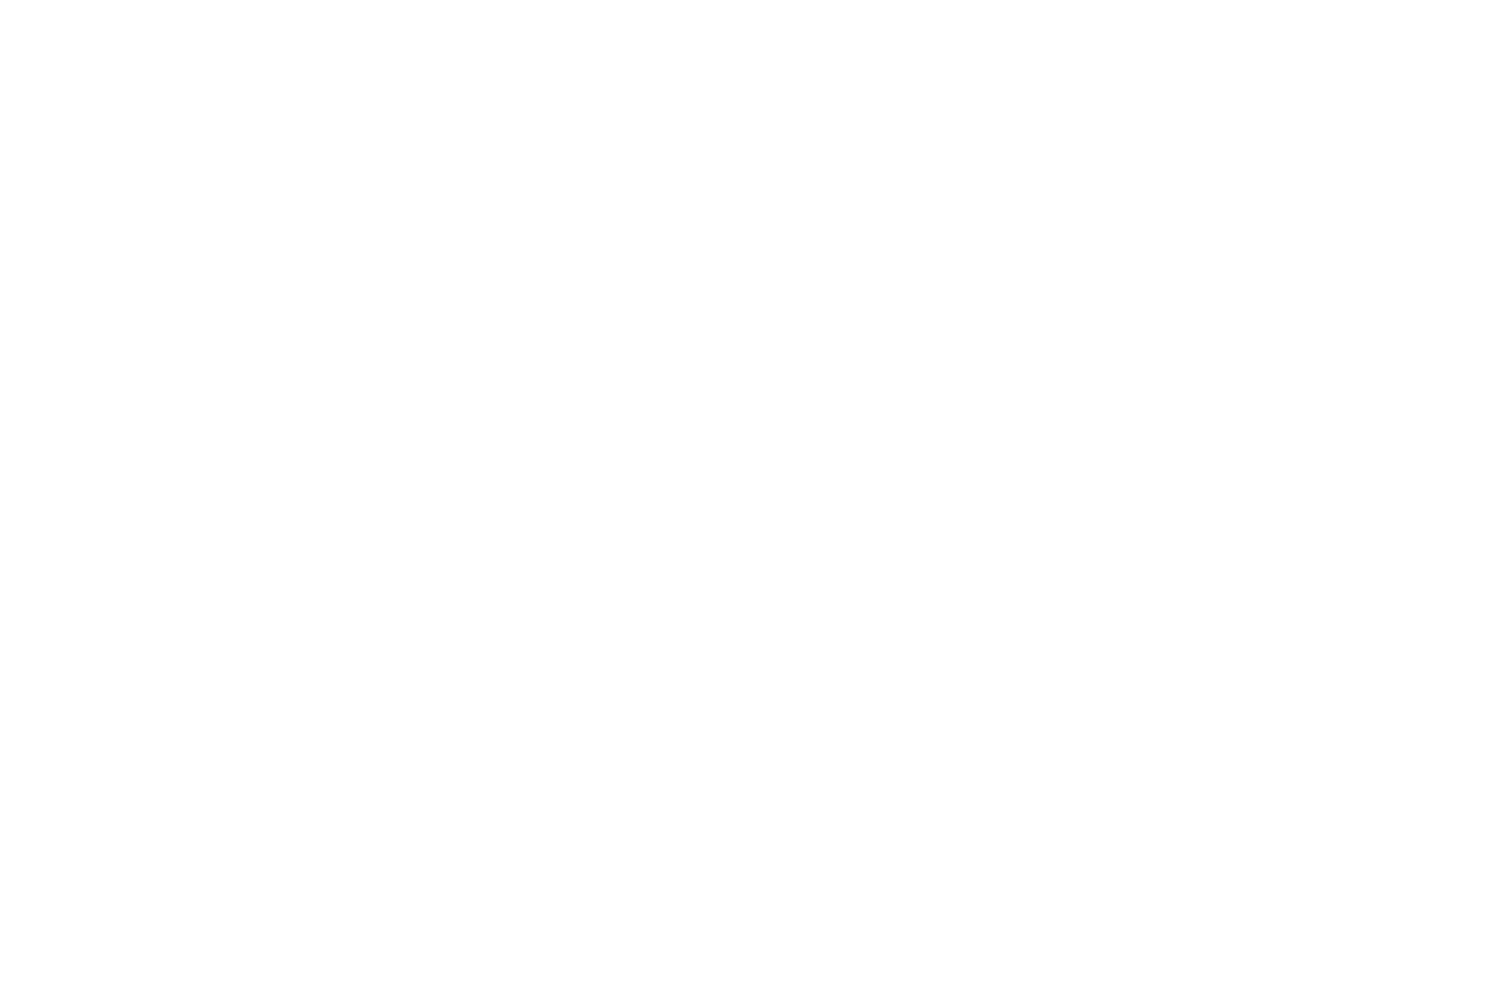

<IPython.core.display.Javascript object>


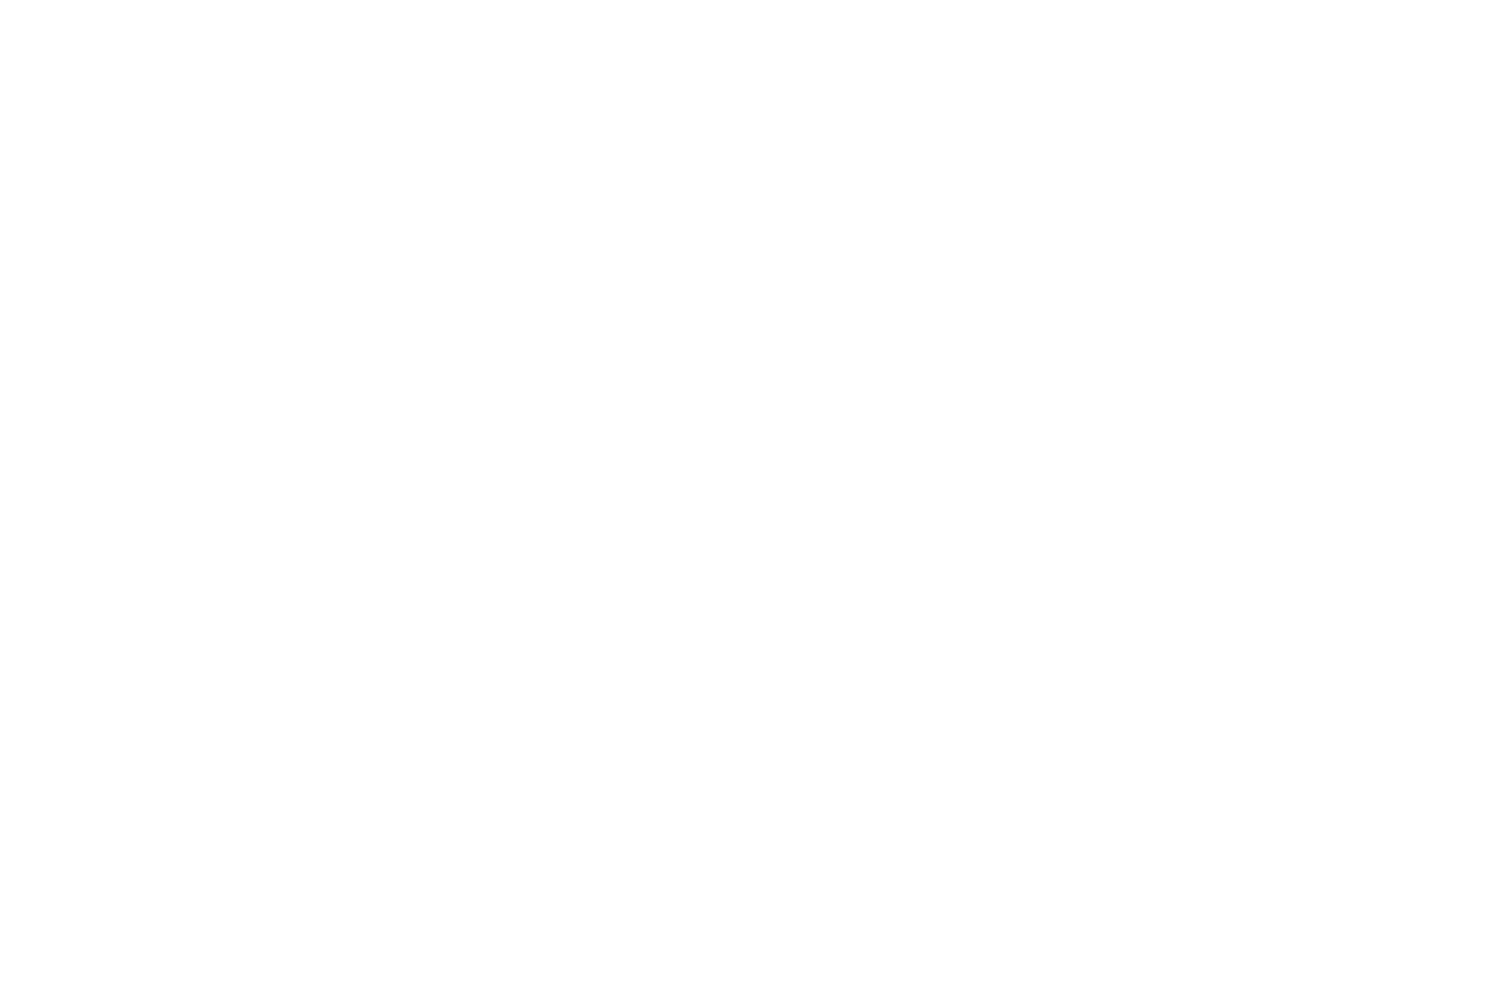

In [30]:
#plot
import seaborn
import matplotlib.pyplot as plt

plt.title("Enchancer distribution", loc='center')

df_exp_plot = df_exp.plot(x='bin_number', y='reads_number' ,figsize=(12,8), grid=True, label="Experimental data", color="red")
df_ran_plot = df_exp.plot(x='bin_number', y='ran_reads_number' ,figsize=(12,8), grid=True, label="Randomized data", color="blue")
fig1 = df_exp_plot.get_figure()
fig2 = df_ran_plot.get_figure()

fig1.savefig('fuck')
fig2.savefig('fuck2')
%matplotlib notebook
